In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATA_PATH = "/content/drive/MyDrive/data/"

# 타이타닉 데이터 전처리
- 스케일링까지

In [3]:
import numpy as np
import pandas as pd

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv")
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv")
train.shape, test.shape

((916, 12), (393, 11))

In [4]:
train['title'] = train['name'].str.extract(' ([A-Za-z]+)\.')
train['title'] = train['title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'UNK')
test['title'] = test['name'].str.extract(' ([A-Za-z]+)\.')
test['title'] = test['title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'UNK')

In [5]:
gender_dict = {"male": 1, "female": 0}

train["gender"] = train["gender"].map(gender_dict)
test["gender"] = test["gender"].map(gender_dict)

In [6]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,494,0,1,"Artagaveytia, Mr. Ramon",1,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
1,462,0,3,"Morley, Mr. William",1,34.0,0,0,364506,8.0500,NaN,S,Mr
2,1286,0,3,"Kink-Heilmann, Mr. Anton",1,29.0,3,1,315153,22.0250,NaN,S,Mr
3,1130,1,2,"Hiltunen, Miss. Marta",0,18.0,1,1,250650,13.0000,NaN,S,Miss
4,461,1,1,"Anderson, Mr. Harry",1,48.0,0,0,19952,26.5500,E12,S,Mr


In [7]:
train_ft = train.drop(["passengerid", "survived", "name", "ticket", "cabin"], axis=1).copy()
test_ft = test.drop(["passengerid", "name", "ticket", "cabin"], axis=1).copy()

In [8]:
train_ft

,pclass,gender,age,sibsp,parch,fare,embarked,title
0,1,1,71.0,0,0,49.5042,C,Mr
1,3,1,34.0,0,0,8.0500,S,Mr
2,3,1,29.0,3,1,22.0250,S,Mr
3,2,0,18.0,1,1,13.0000,S,Miss
4,1,1,48.0,0,0,26.5500,S,Mr
...,...,...,...,...,...,...,...,...
911,1,1,35.0,0,0,512.3292,C,Mr
912,3,1,NaN,0,0,24.1500,Q,Mr
913,3,1,36.0,0,0,7.4958,S,Mr
914,3,1,38.0,0,0,7.8958,S,Mr


In [9]:
train_ft.isnull().sum()

,0
pclass,0
gender,0
age,180
sibsp,0
parch,0
fare,0
embarked,0
title,0


In [10]:
test_ft.isnull().sum()

,0
pclass,0
gender,0
age,83
sibsp,0
parch,0
fare,1
embarked,2
title,0


In [11]:
age_mean = train_ft["age"].mean()
embarked_mode = train_ft["embarked"].mode()[0]

In [12]:
train_ft["age"] = train_ft["age"].fillna(age_mean)
test_ft["age"] = test_ft["age"].fillna(age_mean)
test_ft["fare"] = test_ft["fare"].fillna(12.662634)
test_ft["embarked"] = test_ft["embarked"].fillna(embarked_mode)

In [13]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

In [14]:
from sklearn.preprocessing import OneHotEncoder

cols = ["embarked", "title"]
enc = OneHotEncoder(handle_unknown="ignore")
tmp = enc.fit_transform(train_ft[cols]).toarray()
tmp = pd.DataFrame(tmp, columns=enc.get_feature_names_out())
train_ft = pd.concat([train_ft, tmp], axis=1).drop(cols, axis=1)
train_ft

,pclass,gender,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_UNK
0,1,1,71.000000,0,0,49.5042,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,34.000000,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,29.000000,3,1,22.0250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2,0,18.000000,1,1,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,1,48.000000,0,0,26.5500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,1,1,35.000000,0,0,512.3292,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
912,3,1,29.904891,0,0,24.1500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
913,3,1,36.000000,0,0,7.4958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914,3,1,38.000000,0,0,7.8958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
tmp = enc.transform(test_ft[cols]).toarray()
tmp = pd.DataFrame(tmp, columns=enc.get_feature_names_out())
test_ft = pd.concat([test_ft, tmp], axis=1).drop(cols, axis=1)
test_ft

,pclass,gender,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_UNK
0,1,1,62.000000,0,0,26.5500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,28.000000,0,0,47.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,24.000000,0,0,9.5000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,0,29.904891,0,0,7.7333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,0,18.500000,0,0,7.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,1,19.000000,0,0,7.8958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
389,3,0,15.000000,1,0,14.4542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
390,3,1,21.000000,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
391,3,1,29.904891,0,0,7.8958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [16]:
target = train["survived"]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

In [18]:
train_ft.shape, test_ft.shape

((916, 14), (393, 14))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(random_state=42, penalty='l2', solver='saga')
scores = cross_val_score(model,train_ft,target, scoring="roc_auc", cv=cv, n_jobs=-1)
scores.mean()

0.9017506571642488

# k-NN(K-Nearest Neighber)
- k-최근접 이웃 알고리즘은 머신러닝 알고리즘으로 줄여서 k-NN이라고 함
- 학습데이터를 이용하여 주변의 가장 가까운 K개의 데이터를 보고 예측하는 알고리즘
- 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정하에 사용함
- 회귀, 분류 둘다 사용 가능한 알고리즘

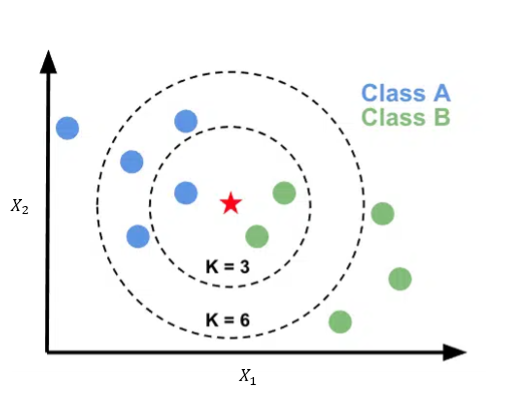

## 거리계산방식
- n개의 특성(Feature)을 가진 데이터의 n차원 공간 상에서
두 점의 거리를 계산하는 방식



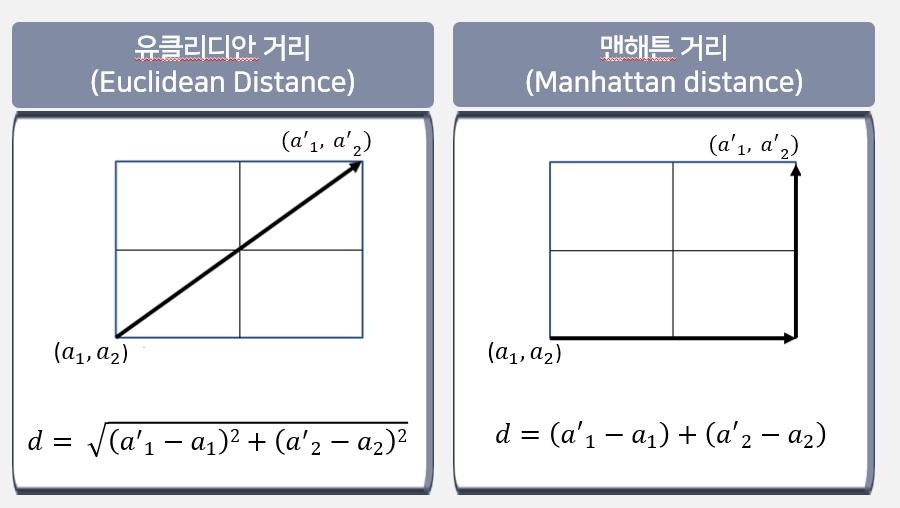

## K개수를 정하는 부분이 중요


- K가 너무 작을 경우 시야가 좁아져 아주 근처에 있는 점 하나에 영향을 받아 예측 성능 저하



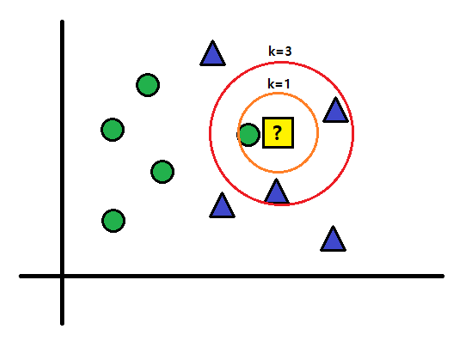

- K가 너무 클 경우 점 간의 경계가 불분명해지기 때문에 예측 성능 저하



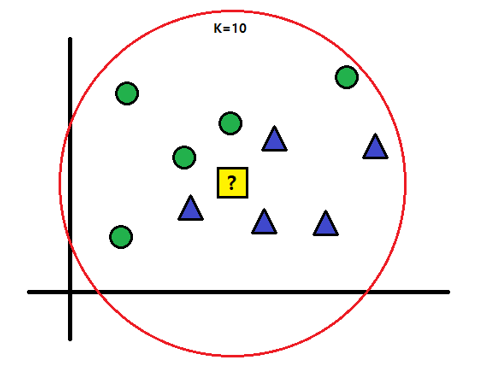

## KNeighborsClassifier 클래스
- 주요 파라미터
    - `n_neighbors` : 이웃수(default=5)
    - `weights`
        - 'uniform' : 기본값, 거리에 상관없이 모든 이웃에 대하여 동일 취급
        - 'distance' : 가중치를 부여하여 멀리있는 이웃보다 가까운 이웃이 더 큰영향을 미치게 함
    - `p`
        - 2 : 기본값, 유클리드 거리
        - 1 : 맨해튼 거리

In [20]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [21]:
cv = KFold(n_splits = 5, shuffle=True, random_state=42)
model = KNeighborsClassifier(n_neighbors=10, p=1, weights="uniform")
scores = cross_val_score(model, train_ft, target, scoring="roc_auc", cv=cv)
scores.mean()

0.9105257655521438

In [23]:
model.fit(train_ft, target)
model.predict(test_ft)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

# 의사결정나무(Decision Tree)
- 회귀, 분류 둘다 사용 가능한 알고리즘
- 여러 가지 규칙을 순차적으로 적용하면서 트리기반의 규칙을 만들어 예측하는 알고리즘
- 쉽게 룰 기반의 프로그램에 적용되는 if, else를 기반으로 나타내는
규칙을 이용하여 예측하는 알고리즘과 유사하여 분류 결과를
인간이 쉽게 이해할 수 있게 표현
- 의사결정나무는 데이터 속에 숨겨진 규칙을 찾아내어, 새로운 데이터에 대해 예측을 수행하는 모델


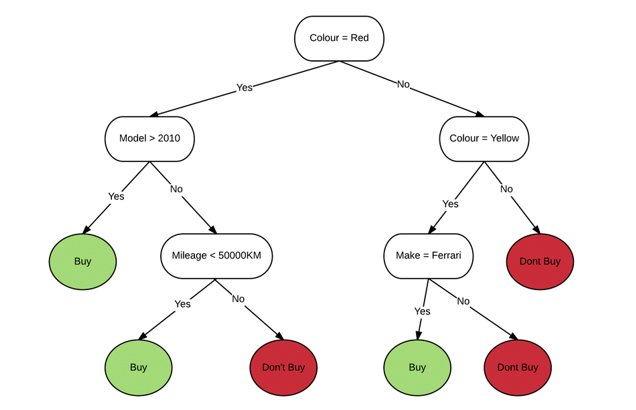

## 의사결정나무의 구성
- 루트 노드 (Root Node): 최 상단에 위치하며
첫 번째 규칙 조건에 해당
- 규칙 노드 (Decision Node): 중간에 위치하는 규칙 조건으로 새로운 규칙 조건마다 서브 트리(Sub Tree) 생성
- 리프 노드 (Leaf Node): 결정된 클래스 값을 가짐



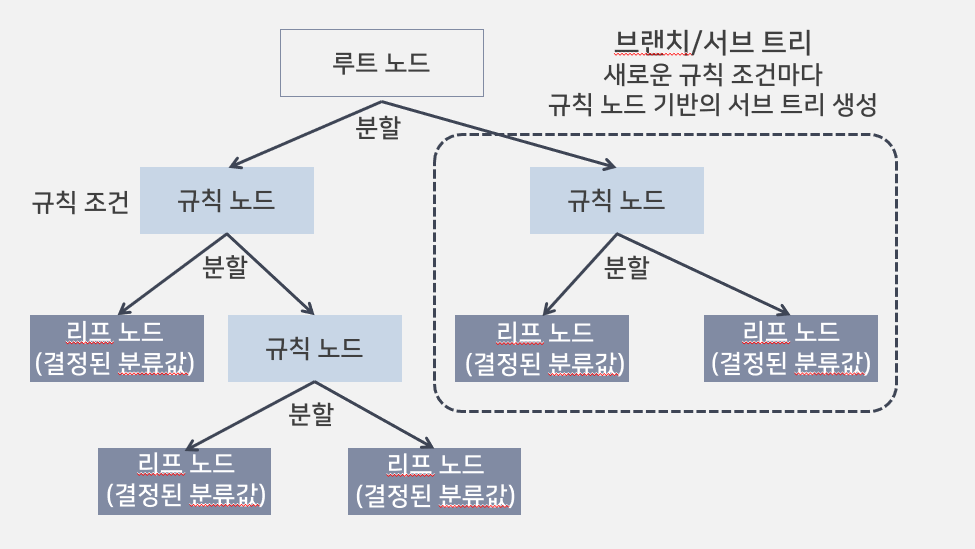

## 의사결정나무의 분리기준
- 의사결정나무에서 규칙에 의해 데이터가 분리될 때 순수도가 높아지는 방향으로 규칙을 정함
- 어떤 특성을 이용하여 분리하는 것이 class의 분포를 가장 잘
구별해 주는지를 파악하여 자식노드가 생성됨
- 부모노드의 순수도에 비해 자식노드들의
순수도가 증가하도록 노드를 형성함
- 순수도
    - 규칙에 의해 동일한 클래스가 포함되는 정도를 의미


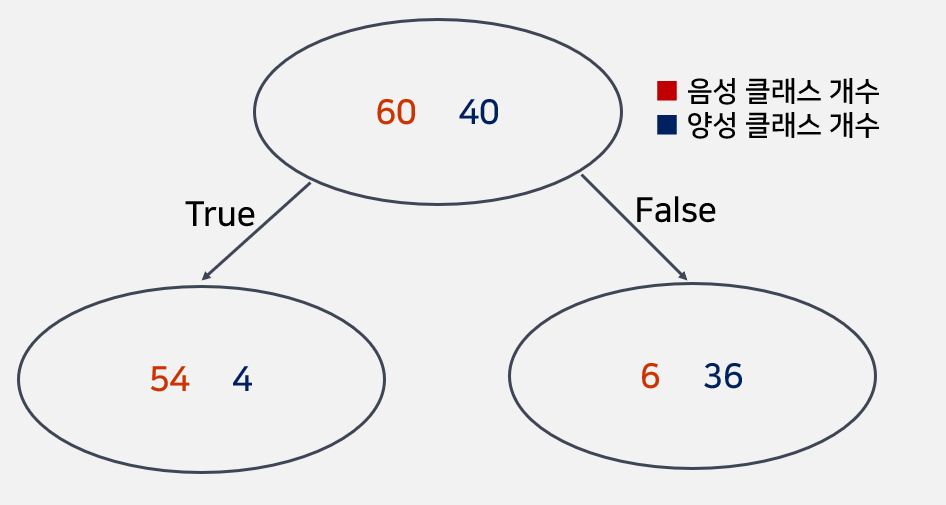

## 분류 문제에서의 순수도 척도
- 지니 계수(Gini Index)
    - 불평등 지수를 나타낼 때 사용하는 계수
    - 지니 계수가 낮을수록 데이터의 순수도가 높아지는 것으로 해석해 지니 계수가 낮아지는 방향으로 분할
$$
G=1-\sum_{j=1}^{n}p_j^2
$$
    - p는 각 클래스의 비율
- 엔트로피(Entropy)
    - 데이터 집합의 혼잡도를 의미함
    - 동일한 클래스가 포함되는 정도가 높으면 엔트로피는 낮고,
아닐 경우 엔트로피가 높아짐
    - 엔트로피가 낮아지는 방향으로 분할
$$
Entropy=-\sum_{j=1}^{n}{p_j}{log_2p_j}
$$
    - p는 각 클래스의 비율


## 특성에 대한 규칙을 정하는 방법​
- 특성의 값을 정렬후에 가능한 모든 분할 지점에 대한 순수도를 평가해서 최고의 분할 지점을 선택​

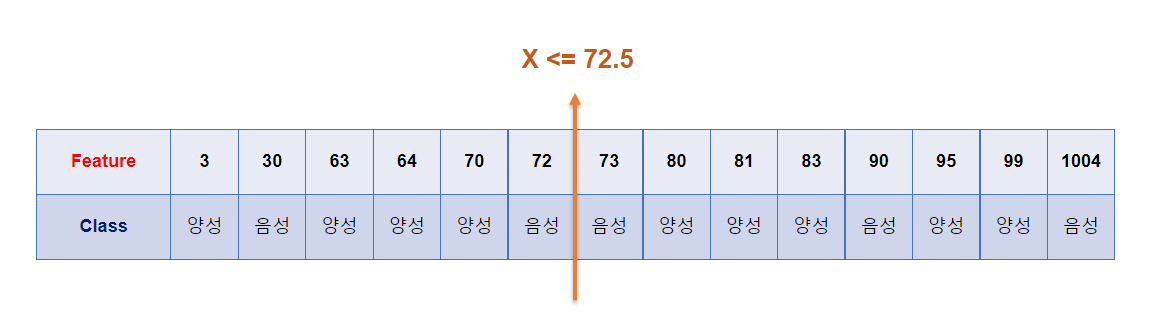

## 의사결정나무 장단점
- 분석결과가 Tree 구조로 시각적으로 표현되기 때문에 쉽게 이해하고 설명할 수 있음
- Tree의 상단에 위치한 변수들이 중요한 예측변수이기 때문에 다른 알고리즘을 위한 Feature Selection 방법으로도 사용할 수 있음
- 분할에 대한 선택이 관측치의 크기에 의해서가 아니기 때문에 Outlier로부터 영향을 거의 받지 않음
- Tree가 복잡해질수록 오버피팅이 발생

## DecisionTreeClassifier 클래스
- 주요 파라미터
    - `random_state`: 시드값
    - `criterion`: 순수도 척도
        - "gini"(기본값), "entropy"
    - `min_samples_split`
        - 기본값 2
        - 노드를 분할하는데 필요한 최소 샘플수를 의미
        - 작게 설정할수록 분할 노드가 많이 생성되어 오버피팅 가능성 증가
    - `max_depth`
        - 기본값 None
        - 트리의 가능한 최대 깊이를 의미
        - 크게 설정할수록 오버피팅 가능성 증가
        - None 일 경우 클래스가 완벽히 분할될 때까지 깊이를 증가시키거나, 노드가 가지는 샘플수가 `min_samples_split` 보다 작아질 때까지 깊이를 증가시킴
    - `min_samples_leaf`
        - 기본값은 1이고 리프노드에 있어야하는 최소 샘플수를 의미
        - 규칙노드가 노드들을 분할할 때 최소 샘플수를 만족 못할 경우 분할하지 않음
    - `max_features`
        - 기본값은 None 이고, 최적의 분할을 위해 고려할 최대 피쳐 개수
        - `int`(개수), `float`(비율), `sqrt`(전체 피처개수), `log2`(전체 피처개수)
    - `max_leaf_nodes`
        - 기본값은 None 으로 리프노드의 최대 개수를 의미
        - 리프노드가 이 파라미터의 개수를 초과하여 생성될 수 없음

In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="roc_auc")
scores.mean()

0.8041207397611034

In [25]:
hp = {
    "random_state": 42,
    "criterion": "entropy",
    "min_samples_split": 5,
    "max_depth": 3,
}

model = DecisionTreeClassifier(**hp)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="roc_auc")
scores.mean()

0.8986031843481198

In [26]:
model.fit(train_ft, target)
model.predict_proba(test_ft)[:,1]

array([0.17727273, 0.17727273, 0.06395349, 0.71428571, 0.71428571,
       0.2962963 , 0.06395349, 0.2962963 , 0.71428571, 0.92753623,
       0.06395349, 0.71428571, 0.92753623, 0.99122807, 0.71428571,
       0.06395349, 0.17727273, 0.06395349, 0.99122807, 0.06395349,
       0.06395349, 0.17727273, 0.71428571, 0.17727273, 0.06395349,
       0.17727273, 0.06395349, 0.17727273, 0.17727273, 0.17727273,
       0.71428571, 0.71428571, 0.66666667, 0.06395349, 0.71428571,
       0.17727273, 0.99122807, 0.17727273, 0.06395349, 0.17727273,
       0.06395349, 0.71428571, 0.06395349, 0.06395349, 0.06395349,
       0.06395349, 0.06395349, 0.06395349, 0.06395349, 0.92753623,
       0.17727273, 0.17727273, 0.71428571, 0.06395349, 0.06395349,
       0.92753623, 0.17727273, 0.2962963 , 0.92753623, 0.06395349,
       0.06395349, 0.06395349, 0.2962963 , 0.92753623, 0.06395349,
       0.99122807, 0.06395349, 0.17727273, 0.71428571, 0.06395349,
       0.06395349, 0.17727273, 0.06395349, 0.99122807, 0.17727

# 의사결정나무 시각화

## 특성 중요도 시각화

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(train_ft, target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
train_ft.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked_C',
       'embarked_Q', 'embarked_S', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_UNK'],
      dtype='object')

In [30]:
model.feature_importances_

array([0.07165837, 0.83048123, 0.02829865, 0.01582167, 0.        ,
       0.05374007, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

<Axes: ylabel='None'>

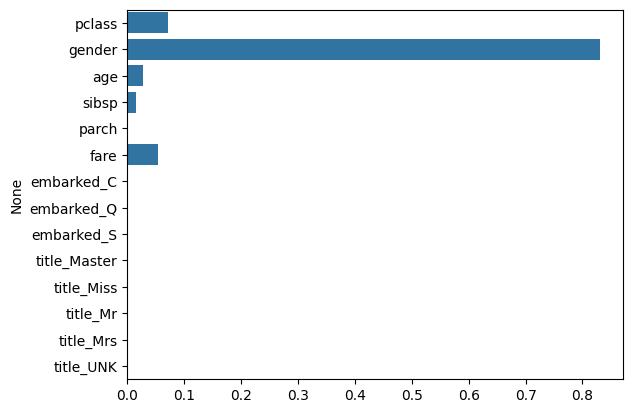

In [31]:
sns.barplot(x=model.feature_importances_, y=train_ft.columns)

## 의사결정나무 모델 시각화

In [32]:
from sklearn.tree import export_graphviz
params = {
    "decision_tree": model, # 학습된 의사결정나무 모델 객체
    "out_file": "tree.dot", # 파일명
    "feature_names": train_ft.columns, # 사용된 피처명
    "class_names": ["Died", "Survived"],
}
export_graphviz(**params)

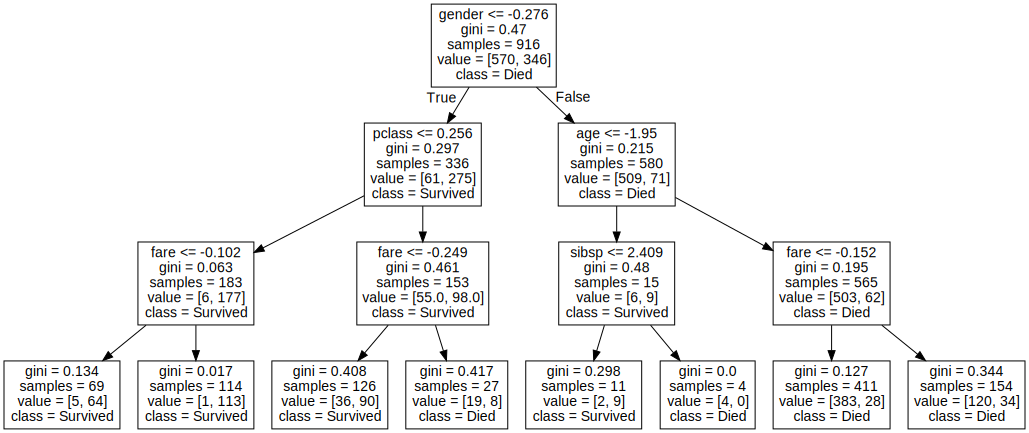

In [33]:
import graphviz # 그래프 형태의 파일 형식(graphviz 파일형식)을 불러와서 시각화해주는 라이브러리

with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

In [34]:
tree.render("tree") # pdf 파일로 저장

'tree.pdf'

In [35]:
tree.render("tree", format="png")

'tree.png'

- graphviz 형식을 파일로 저장하지 않고 바로 시각화

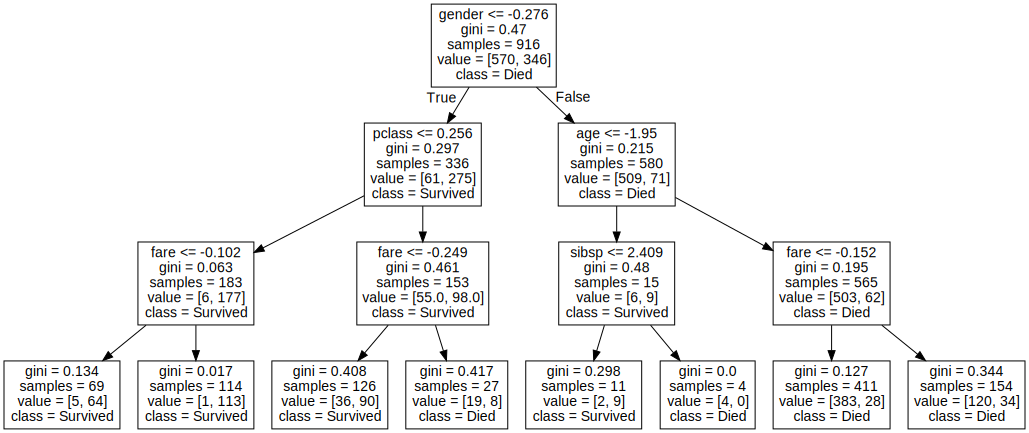

In [152]:
params = {
    "decision_tree": model, # 학습된 의사결정나무 모델 객체
    # "out_file": None,
    "feature_names": train_ft.columns, # 사용된 피처명
    "class_names": ["Died", "Survived"],
}
dot_data = export_graphviz(**params)
tree = graphviz.Source(dot_data)
tree